Some Python practice to implement some of the Monte Carlo methods lightly covered in my Econometrics course. Guidance from QuantEcon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import random

Triangular Distribution

In [326]:
# adjustable parameters
left =1 
mode = 2
right = 5
left_side = range(left, mode+1)
right_side = range(mode, right+1)

In [327]:
# make the lower
lower = []
for i in left_side:
    lower.append((2*(i - left)) / ((right-left) * (mode - left)))

In [328]:
#make the upper
upper = []
for i in right_side:
    upper.append((2*(right-i))/((right-left) * (right-mode)))

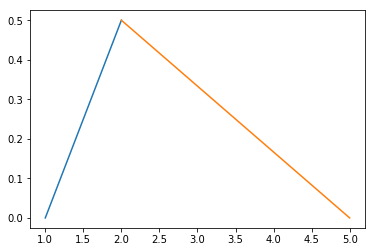

In [329]:
plt.plot(left_side, lower)
plt.plot(right_side, upper)

Random samples for triangular distribution using built-in RNG

(array([ 49., 129., 176., 177., 161., 115.,  84.,  56.,  37.,  16.]),
 array([1.02690159, 1.41748536, 1.80806914, 2.19865291, 2.58923668,
        2.97982045, 3.37040422, 3.76098799, 4.15157176, 4.54215553,
        4.9327393 ]),
 <a list of 10 Patch objects>)

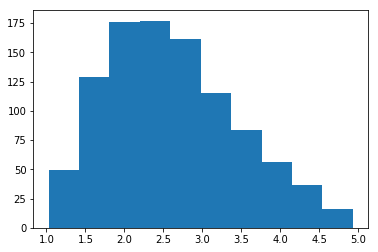

In [330]:
plt.hist(np.random.triangular(left, mode, right, 1000))

Rejection Sampling Method

In [331]:
# horizontal interval:
h = range(left, right+1)
# upper bound of vertical interval: 
v = .6
n = 1000 # number of random samples


In [332]:
# function to find p(x) given x 
def px(x):
    if(x<=mode):
        return (2*(x-left))/((right-left)*(mode-left))
    if(x>mode):
        return (2*(right-x))/((right-left)*(right-mode))

In [333]:
# create random points
rand_x = []
rand_g = []
valids = []
for i in range(n):
    #rand_x.append(random.uniform(left, right))
    #rand_g.append(random.uniform(0, v))
    xrand = random.uniform(left, right)
    g_rand = random.uniform(0,v)
    if(g_rand<px(xrand)):
        valids.append(xrand)
    

In [334]:
p_valids = [px(x_) for x_ in valids]

(array([10., 24., 38., 48., 46., 47., 37., 37., 31., 24., 32., 17., 21.,
         8.,  5.]),
 array([1.01033112, 1.26592073, 1.52151033, 1.77709993, 2.03268954,
        2.28827914, 2.54386875, 2.79945835, 3.05504795, 3.31063756,
        3.56622716, 3.82181677, 4.07740637, 4.33299597, 4.58858558,
        4.84417518]),
 <a list of 15 Patch objects>)

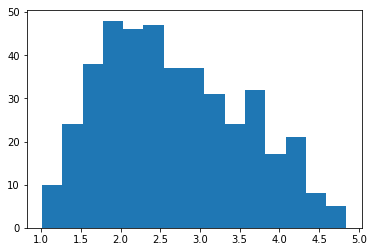

In [335]:
plt.hist(valids, bins=15)

Metropolis-Hastings algorithm 
https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm

In [2]:
# initialization
x0 = 1.2
sigma = 0.5
thin = 50 # variable to set how many xt values get tossed out

In [337]:
def my_metro(N, x0):
    xt_values = []
    burn = 100
    #thin = 50 # 1 out of every thin (e.g. 1 out of every 50)
    xt = x0
    for i in range(N+burn):
        xp = sigma*np.random.randn() + xt
        A = px(xp)/px(xt) # acceptance ratio
        U = np.random.rand(1)
        if(U[0]<=A): #accept condition. otherwise leave xt as is 
            xt = xp
        if(i > 99): # do not include first 100 iterations
            xt_values.append(xt)
    
    #for x in xt_values:
        #if xt_values.index(x) % thin != 0: 
            #xt_values.remove(x)
    
    
    return xt_values
    

(array([9., 3., 2., 4., 2.]),
 array([1.11322595, 1.80235899, 2.49149203, 3.18062507, 3.86975811,
        4.55889115]),
 <a list of 5 Patch objects>)

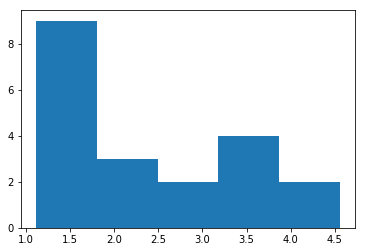

In [317]:
plt.hist(my_metro(1000,x0)[::thin], bins=5)

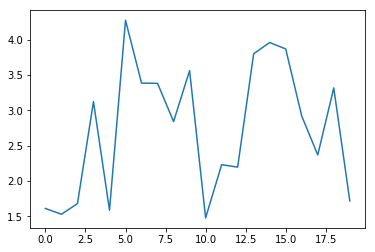

In [311]:
plt.plot(my_metro(1000,x0)[::50])

(array([ 38., 126., 193., 201., 157., 127.,  82.,  50.,  18.,   8.]),
 array([1.07136845, 1.45627124, 1.84117404, 2.22607683, 2.61097963,
        2.99588242, 3.38078522, 3.76568801, 4.1505908 , 4.5354936 ,
        4.92039639]),
 <a list of 10 Patch objects>)

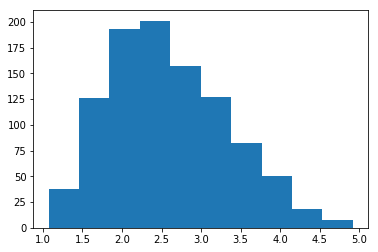

In [312]:
#without thinning 
plt.hist(my_metro(1000,x0))